In [249]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import warnings 

In [250]:
df = pd.read_csv('../../../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [251]:
round(df.describe(), 2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [252]:
#df=df.drop(['id'], axis=1, inplace=True)

In [253]:
df['date']=pd.to_datetime(df['date'])

In [254]:
df=df.dropna()

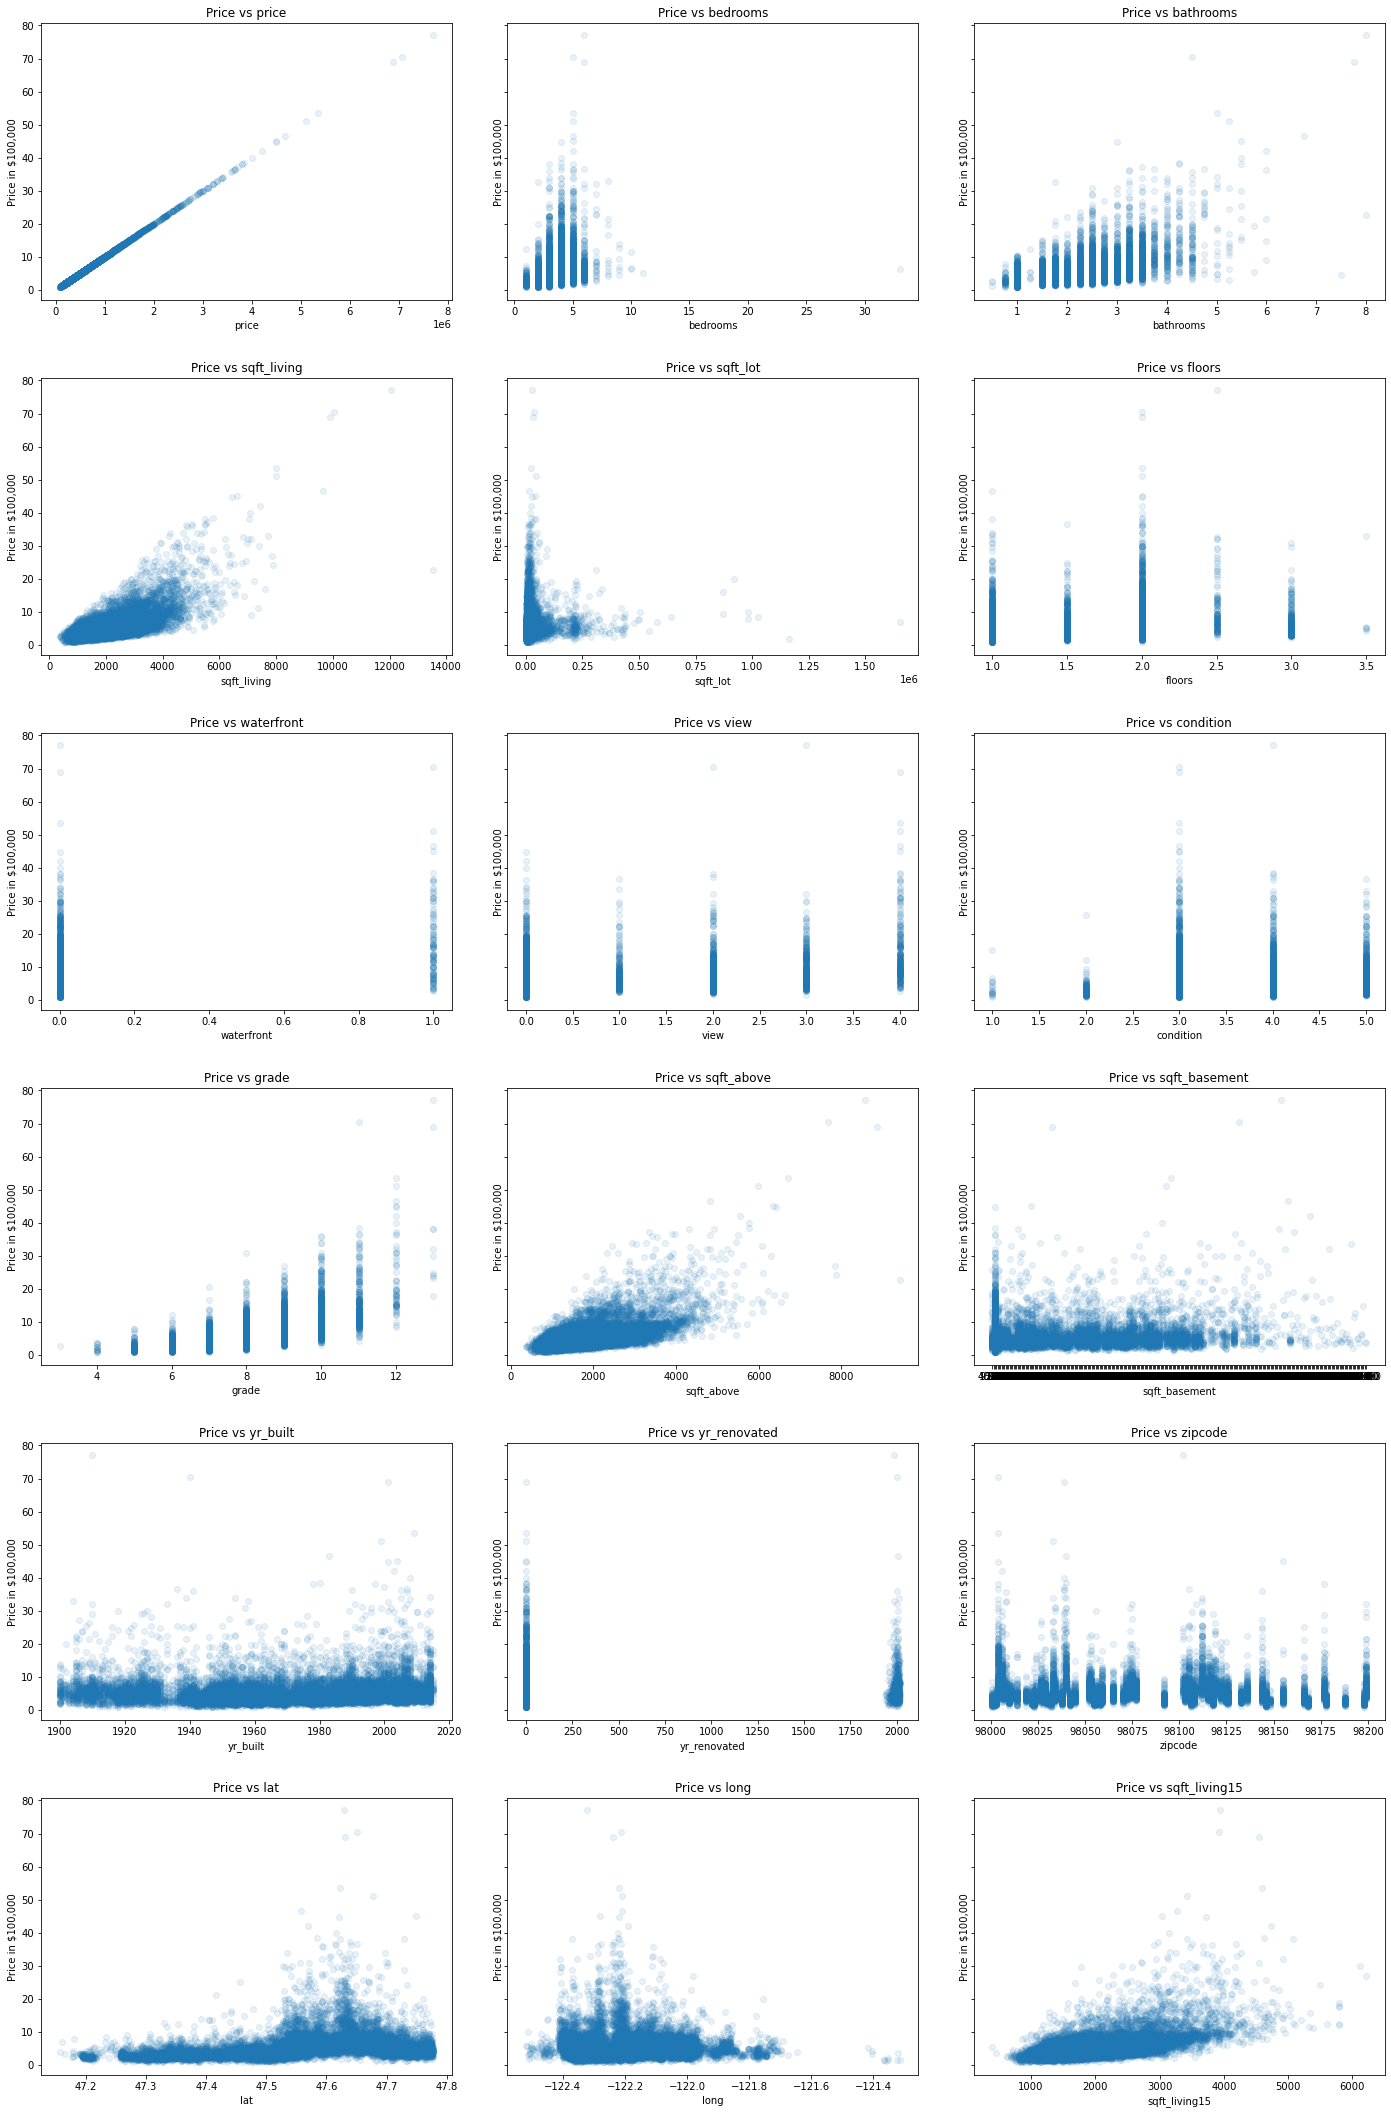

In [255]:
fig, axes = plt.subplots(6, 3, figsize=(20,30), sharey=True)
for ax, column in zip(axes.flatten(), df.columns[2:]):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')
fig.tight_layout(pad=3.0)

<ipython-input-256-cbfb53bb7ecf>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqf

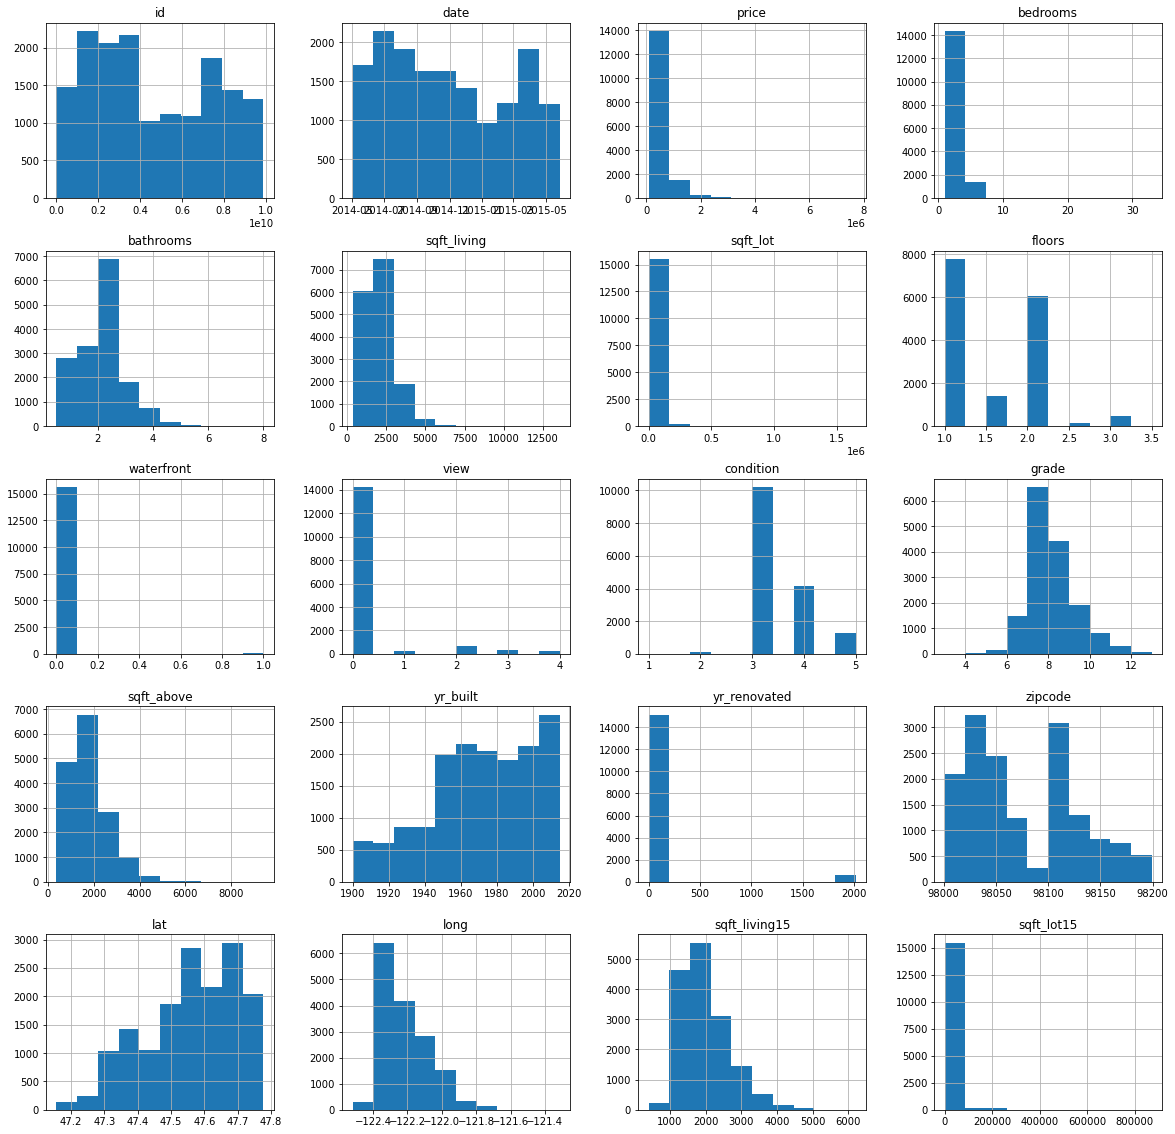

In [256]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
df.hist(ax = ax)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15762 non-null  int64         
 1   date           15762 non-null  datetime64[ns]
 2   price          15762 non-null  float64       
 3   bedrooms       15762 non-null  int64         
 4   bathrooms      15762 non-null  float64       
 5   sqft_living    15762 non-null  int64         
 6   sqft_lot       15762 non-null  int64         
 7   floors         15762 non-null  float64       
 8   waterfront     15762 non-null  float64       
 9   view           15762 non-null  float64       
 10  condition      15762 non-null  int64         
 11  grade          15762 non-null  int64         
 12  sqft_above     15762 non-null  int64         
 13  sqft_basement  15762 non-null  object        
 14  yr_built       15762 non-null  int64         
 15  yr_renovated   1576

In [258]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [259]:
for col in df.columns:
    print('\n')
    print(col, df[col].value_counts())



id 5101402435    2
3883800011    2
7701960990    2
2621600015    2
3935900232    2
             ..
1313000220    1
1122059037    1
2594200350    1
9406530160    1
1823049202    1
Name: id, Length: 15676, dtype: int64


date 2014-06-25    103
2014-06-23    102
2015-04-28     93
2014-07-14     93
2014-07-08     93
             ... 
2014-11-15      1
2014-05-11      1
2015-01-10      1
2015-05-10      1
2015-02-01      1
Name: date, Length: 369, dtype: int64


price 350000.0    129
450000.0    120
500000.0    115
550000.0    113
425000.0    111
           ... 
584950.0      1
295700.0      1
546200.0      1
428750.0      1
626700.0      1
Name: price, Length: 3034, dtype: int64


bedrooms 3     7120
4     5079
2     2003
5     1183
6      192
1      141
7       23
8       10
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64


bathrooms 2.50    4004
1.00    2761
1.75    2226
2.25    1487
2.00    1395
1.50    1060
2.75     853
3.00     543
3.50     543
3.25     428


In [260]:
df['bedrooms'].describe()

count    15762.000000
mean         3.378949
std          0.935301
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [261]:
mean_bed_no_outliers = df.loc[(df['bedrooms'] != 33) | (df['bedrooms'] != 0), 'bedrooms'].mean()

In [262]:
df['bedrooms'] = np.where((df['bedrooms'] == 33) | (df['bedrooms'] == 0), round(mean_bed_no_outliers), df['bedrooms'])

In [263]:
df['bathrooms'].describe()

count    15762.000000
mean         2.120797
std          0.766772
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [264]:
print(sum(df['bathrooms'] >= 6.0))
print(df['bathrooms'].quantile(.9994))

10
5.885849999999664


In [265]:
mean_bath_no_outliers = df.loc[(df['bathrooms'] != 0) | (df['bathrooms'] < 6.0), 'bathrooms'].mean()

In [266]:
df['bathrooms'] = np.where((df['bathrooms'] == 0) | (df['bathrooms'] >= 6.0), round(mean_bath_no_outliers), df['bathrooms'])

In [267]:
df_pred = df.drop(['date', 'price', 'lat', 'long'], axis=1)
df_pred.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
1,6414100192,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
3,2487200875,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
5,7237550310,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,4760,101930
6,1321400060,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,NaN,1995,0.0,98003,2238,6819


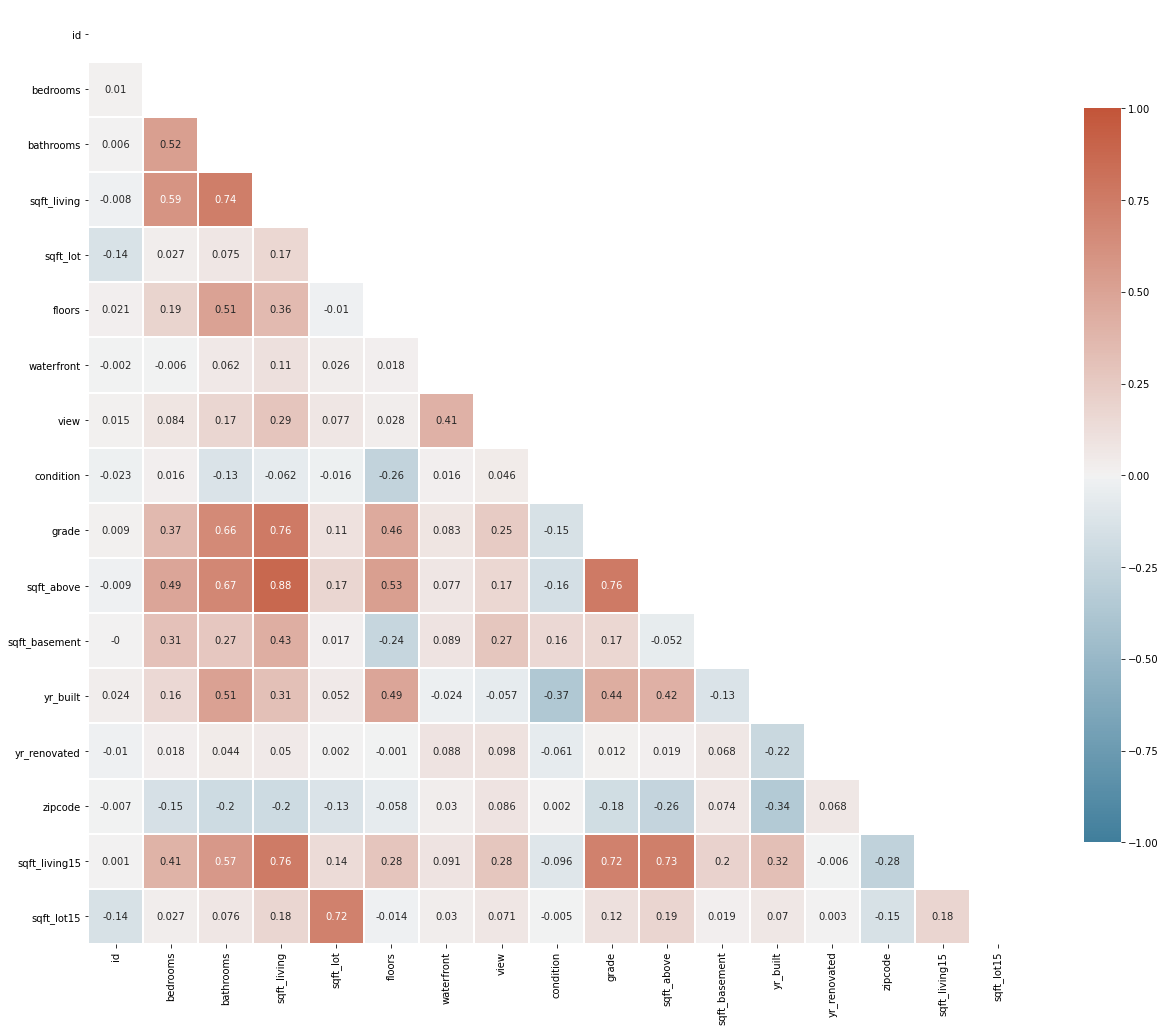

In [268]:
corr = round(df_pred.corr(), 3)

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(21, 18))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .75}, annot=True)
plt.show()

In [269]:
#cells to take out of df - bathrooms, sqft_above, grade,sgft_living15, sgft_lot15, bedrooms

In [270]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
corr_pred = df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_pred['pairs'] = list(zip(corr_pred.level_0, corr_pred.level_1))

# set index to pairs
corr_pred.set_index(['pairs'], inplace=True)

#drop level columns
corr_pred.drop(columns=['level_0', 'level_1'], inplace=True)

# rename correlation column as cc rather than 0
corr_pred.columns = ['cc']

# drop duplicates
corr_pred.drop_duplicates(inplace=True)

In [271]:
corr_pred[(corr_pred.cc>.75) & (corr_pred.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876176
"(sqft_living, grade)",0.764251
"(grade, sqft_above)",0.758289
"(sqft_living, sqft_living15)",0.756676


In [272]:
categorical = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']

for column in df[categorical]:
    df[categorical] = df[categorical].astype('category')

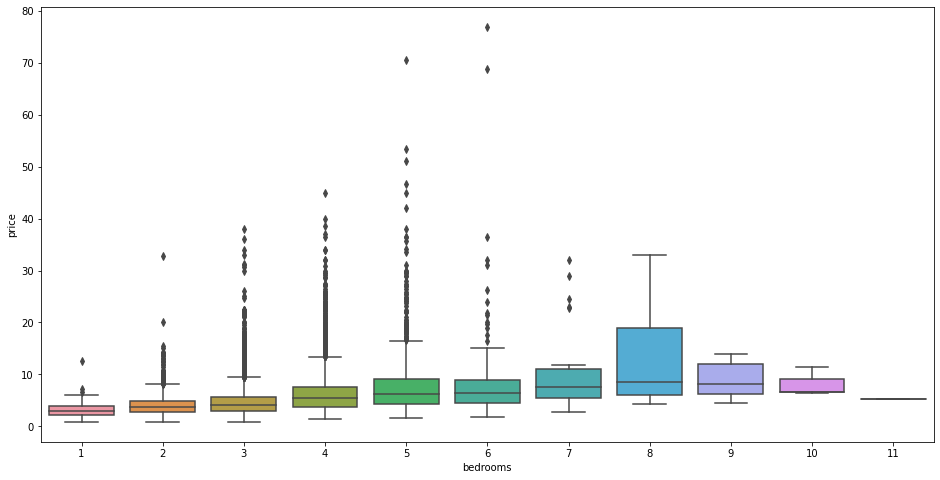

In [273]:
var = 'bedrooms'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='price', data=data)

C:\Users\kindl\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\kindl\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


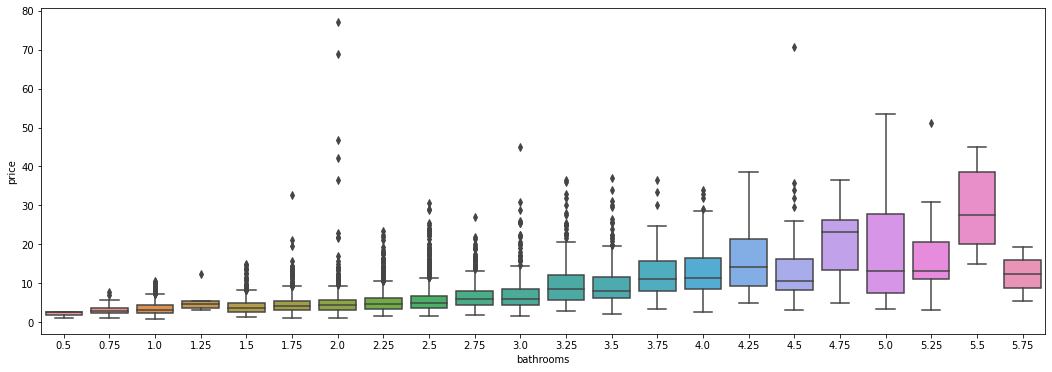

In [274]:
var = 'bathrooms'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(18,6))
fig = sns.boxplot(x=var, y='price', data=data)

C:\Users\kindl\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


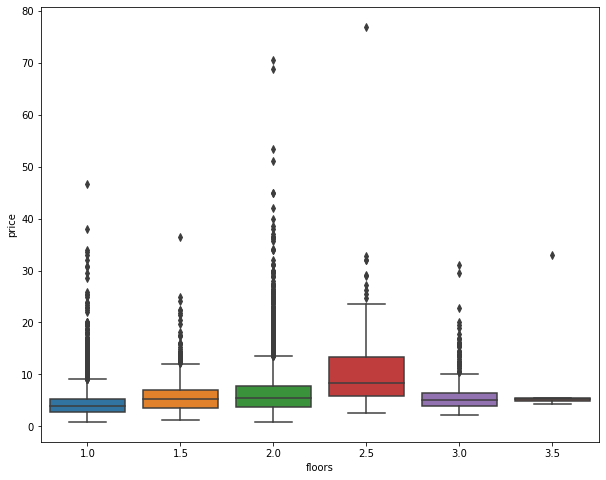

In [275]:
var = 'floors'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)

C:\Users\kindl\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


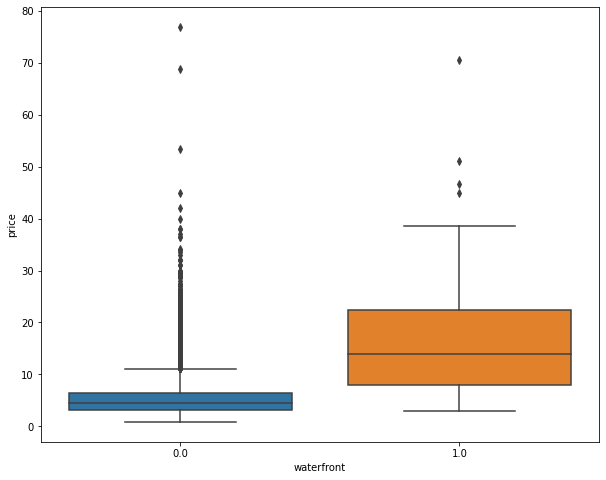

In [276]:
var = 'waterfront'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)
#1 being on waterfront then 0 being off water front

C:\Users\kindl\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


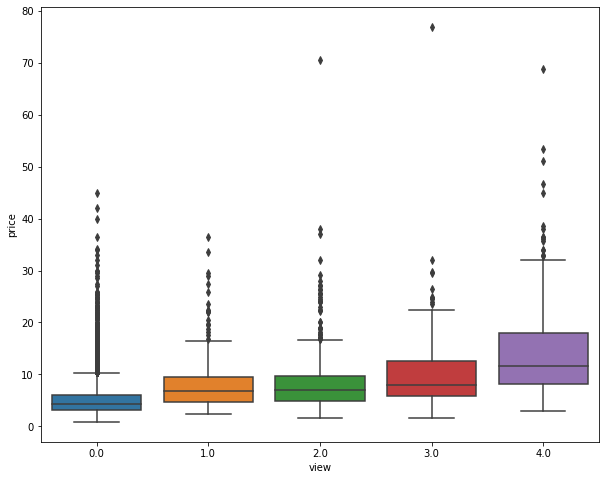

In [277]:
var = 'view'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)
#view is graded 1-4 

In [278]:
mean_no_view = df.loc[(df['view'] == 0), 'price'].mean()
mean_view = df.loc[(df['view'] != 0), 'price'].mean()
mean_view - mean_no_view
#a difference in the means 

455467.38816238416

In [279]:
n_view = len(df.loc[(df['view'] != 0)])
n_no_view = len(df.loc[(df['view'] == 0)])

crit = stats.t.ppf(1-0.025, (n_view+n_no_view-2))
crit

1.960114520728705

In [280]:
no_view_price = df.loc[(df['view'] == 0), 'price']
view_price = df.loc[(df['view'] != 0), 'price']

In [281]:
stats.ttest_ind(no_view_price, view_price)

Ttest_indResult(statistic=-48.64562857260553, pvalue=0.0)

In [282]:
df['yes_view'] = np.where(df['view'] != 0, 1, 0)

In [283]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yes_view
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819,0


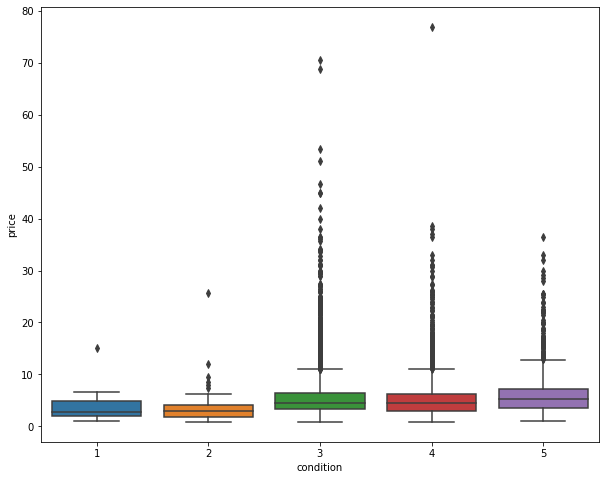

In [284]:
var = 'condition'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)
#

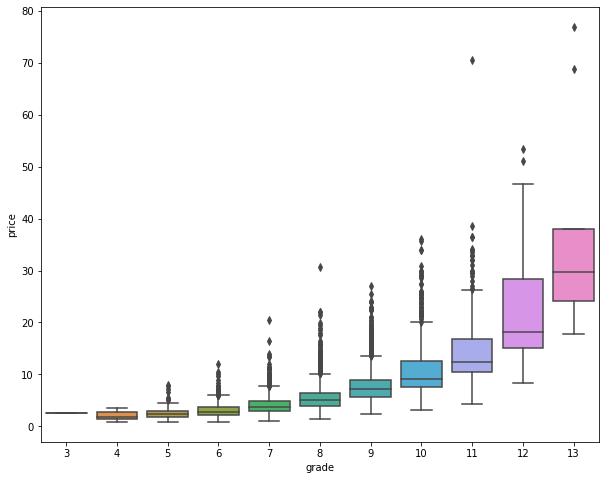

In [285]:
var = 'grade'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)

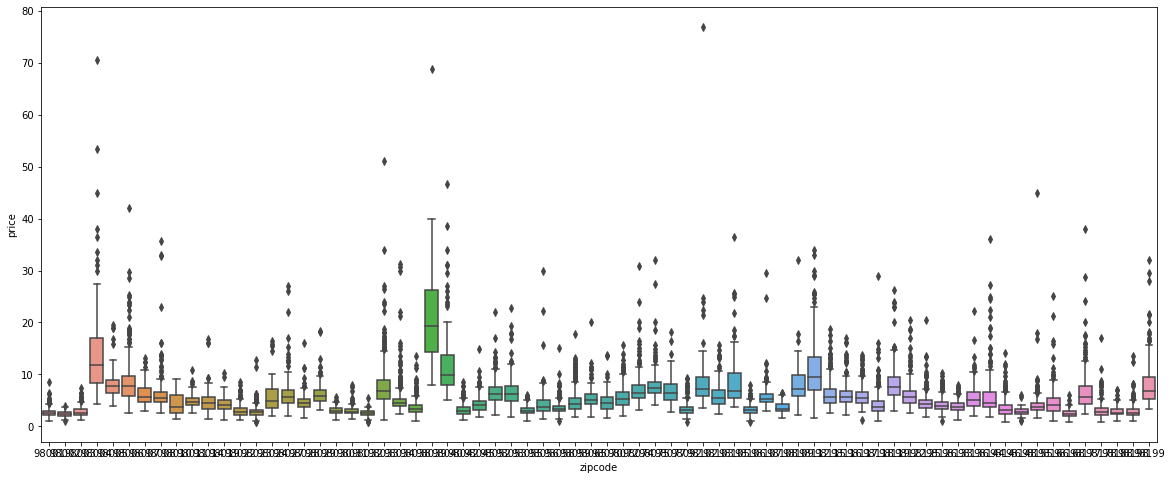

In [286]:
var = 'zipcode'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(20,8))
fig = sns.boxplot(x=var, y='price', data=data)

In [287]:
#New starting point 

In [288]:
formula = 'price ~ C(zipcode)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)
#not sure what this does 

                  sum_sq       df           F  PR(>F)
C(zipcode)  8.833580e+14     69.0  154.490567     0.0
Residual    1.300361e+15  15692.0         NaN     NaN


In [289]:
sum(df['long'] > -121.6763)

13

In [290]:
mean_price_not_rural_east = df.loc[df['long'] < -121.6763, 'price'].mean()
mean_price_long_rural_east = df.loc[df['long'] > -121.6763, 'price'].mean()
mean_price_not_rural_east - mean_price_long_rural_east

# difference in mean between rural east and rest of df

278546.91243888496

In [291]:
df_rural_east = df.loc[df['long'] > -121.6763]
df_rural_east

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yes_view
2587,5061300030,2014-05-08,134000.0,2,1.50,980,5000,2.0,0.0,0.0,...,980,0.0,1922,2003.0,98014,47.7076,-121.359,1040,5000,0
3292,9413400165,2014-06-24,380000.0,3,2.25,1860,15559,2.0,0.0,0.0,...,1860,0.0,1963,0.0,98022,47.1559,-121.646,1110,11586,0
4199,1437500015,2014-07-09,150000.0,3,0.75,490,38500,1.5,0.0,0.0,...,490,0.0,1959,0.0,98014,47.7112,-121.315,800,18297,0
4844,192300020,2014-05-21,525000.0,3,2.75,2100,10362,2.0,0.0,0.0,...,1510,590.0,1998,0.0,98045,47.4347,-121.417,2240,11842,0
6083,5062300280,2015-04-16,150000.0,3,1.00,890,6488,1.5,0.0,0.0,...,890,0.0,1928,0.0,98014,47.7087,-121.352,1330,16250,0
10084,7805600070,2014-11-11,200000.0,2,1.75,1320,13052,1.5,0.0,0.0,...,1320,0.0,1980,0.0,98014,47.7120,-121.352,1320,13052,0
13236,8649400410,2015-04-17,375000.0,3,1.75,2140,13598,1.5,0.0,0.0,...,1620,520.0,1970,0.0,98014,47.7139,-121.321,930,10150,0
14601,8649400790,2015-01-13,160000.0,3,1.00,1340,18552,1.5,0.0,0.0,...,1340,0.0,1935,0.0,98014,47.7129,-121.325,960,15141,0
14722,4032500035,2014-09-13,295000.0,2,1.75,1560,43748,2.0,0.0,0.0,...,1560,0.0,1967,2000.0,98065,47.5729,-121.676,1000,24602,0
16927,2626119028,2015-03-23,160000.0,3,1.00,1140,3240,1.5,0.0,0.0,...,1140,0.0,1910,0.0,98014,47.7093,-121.364,1140,4700,0


In [292]:
df['rural_east'] = np.where(df['long']>= -121.6763, 1, 0)

In [293]:
df['rural_east'].value_counts()

0    15749
1       13
Name: rural_east, dtype: int64

In [294]:
cat_list_2 = ['bedrooms', 'bathrooms', 'grade']
dummies = pd.get_dummies(df[cat_list_2], prefix=cat_list_2, drop_first=True)

df_preprocessed = df.drop(cat_list_2, axis=1)

df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

df_preprocessed.head().dropna()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
1,6414100192,2014-12-09,538000.0,2570,7242,2.0,0.0,0.0,3,2170,...,0,0,0,1,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,1960,5000,1.0,0.0,0.0,5,1050,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,1680,8080,1.0,0.0,0.0,3,1680,...,0,0,0,0,1,0,0,0,0,0
5,7237550310,2014-05-12,1230000.0,5420,101930,1.0,0.0,0.0,3,3890,...,0,0,0,0,0,0,0,1,0,0


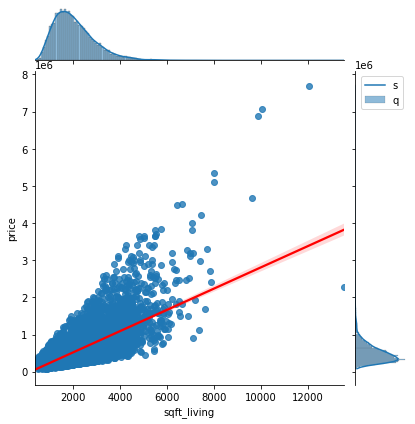

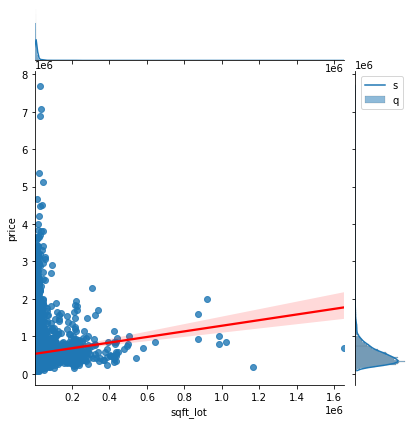

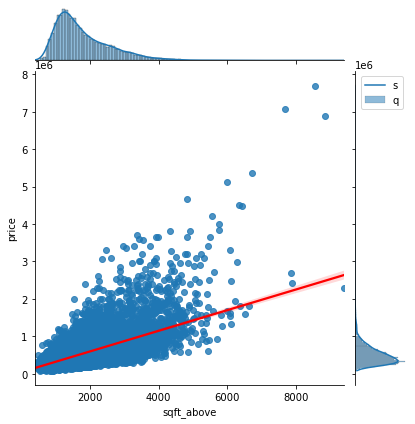

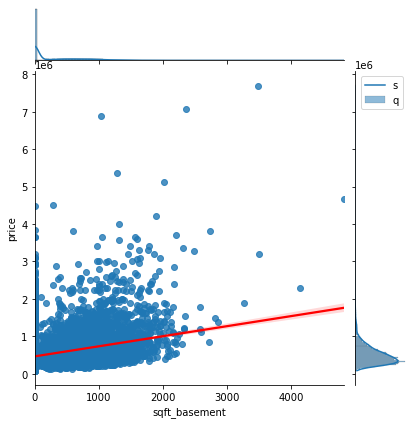

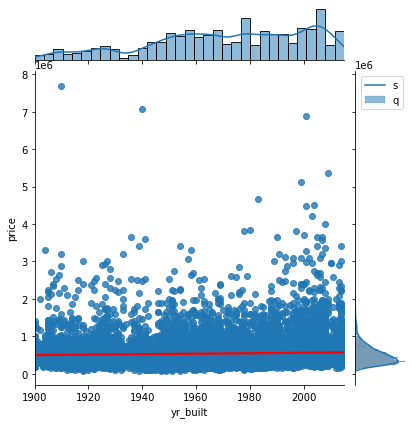

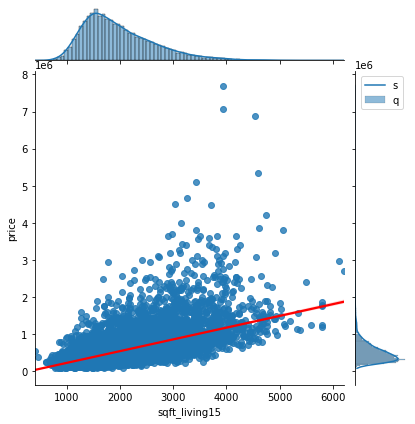

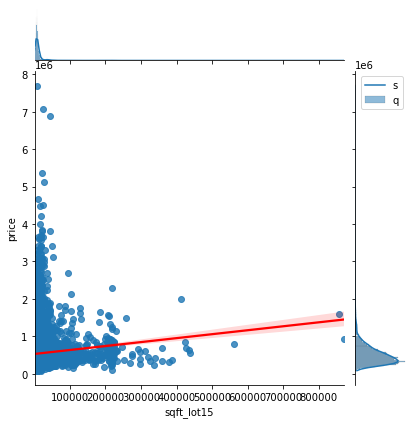

In [295]:
continuous = ['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','sqft_living15','sqft_lot15']

for column in continuous:
    sns.jointplot(x=column, y="price", data=df, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend('sqft_living')
    plt.show()

In [296]:
df_preprocessed['basement'] = np.where((df_preprocessed['sqft_basement'] != 0), 1, 0)
#boolean column 

In [297]:
yr_built_med = df_preprocessed['yr_built'].median()
yr_built_med

1975.0

In [298]:
df_preprocessed['yr_built_reno'] = np.where((df_preprocessed['yr_built'] < 1974) & (df_preprocessed['yr_renovated'] == 0), 0,1)

In [299]:
df_preprocessed['yr_built_reno'].value_counts()

1    8696
0    7066
Name: yr_built_reno, dtype: int64

In [300]:
features = ['sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition','yes_view', 'rural_east', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9',
       'bedrooms_10', 'bedrooms_11', 'bathrooms_0.75', 'bathrooms_1.0',
       'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0',
       'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0',
       'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0',
       'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0',
       'bathrooms_5.25', 'bathrooms_5.5', 'bathrooms_5.75',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'basement',
       'yr_built_reno']

df_features = df_preprocessed[features]

target = df_preprocessed['price']
target

1         538000.0
3         604000.0
4         510000.0
5        1230000.0
6         257500.0
           ...    
21591     475000.0
21592     360000.0
21593     400000.0
21594     402101.0
21596     325000.0
Name: price, Length: 15762, dtype: float64

In [301]:
len(features)

51

In [302]:
target

1         538000.0
3         604000.0
4         510000.0
5        1230000.0
6         257500.0
           ...    
21591     475000.0
21592     360000.0
21593     400000.0
21594     402101.0
21596     325000.0
Name: price, Length: 15762, dtype: float64

In [303]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.3, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

11033 4729 11033 4729


In [306]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)
#house price prediction ~217k 

Training Root Mean Squared Error: 217178.7541490905


In [307]:
lm.coef_

array([ 1.65434600e+02, -2.85153230e-01,  5.46292428e+04,  5.77171850e+05,
        3.22859900e+04,  3.68221742e+04,  3.68963676e+04, -9.43804538e+04,
       -8.78939742e+03, -6.77661188e+04, -9.48308910e+04, -1.00153008e+05,
       -1.20898465e+05, -1.64826473e+05,  1.92994630e+05, -5.05711387e+04,
       -3.39838163e+05,  8.40344001e-07,  1.67891604e+03,  7.17655628e+04,
       -1.59564407e+04,  4.74589150e+04,  5.47321814e+04,  7.25948124e+04,
        5.17336106e+04,  1.44851792e+04,  4.04546526e+04,  8.02612884e+04,
        9.86513552e+04,  6.55062402e+04,  2.17400275e+05,  1.39960717e+05,
        2.43127363e+05,  1.72919991e+05,  4.27560782e+05,  3.69325285e+05,
        5.37515496e+05,  6.18782038e+05, -2.90848728e+05, -5.70069342e+04,
       -7.24790242e+04, -4.47554024e+04,  1.56959042e+04,  1.06272902e+05,
        2.37941046e+05,  4.04243427e+05,  5.86499059e+05,  1.09110088e+06,
        2.29337418e+06,  4.22204516e+04, -1.06034787e+05])

In [308]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)

In [309]:
coefficients

,0,0
0,sqft_living,1.654346e+02
1,sqft_lot,-2.851532e-01
2,floors,5.462924e+04
3,waterfront,5.771719e+05
4,view,3.228599e+04
5,condition,3.682217e+04
6,yes_view,3.689637e+04
7,rural_east,-9.438045e+04
8,bedrooms_2,-8.789397e+03
9,bedrooms_3,-6.776612e+04


In [310]:
test_preds = lm.predict(X_test)

In [312]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_preds))
print(test_rmse )

203793.68347545958


C:\Users\kindl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


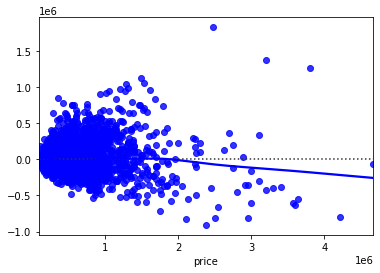

In [315]:
sns.residplot(y_test, test_preds, lowess=True, color='b');